In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading Dataset and set the column name

In [99]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Diabetes Classification/pima-indians-diabetes.csv')
df.columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']

In [100]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


## Shape of DataFrame

In [101]:
df.shape

(767, 9)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               767 non-null    int64  
 1   Glucose                   767 non-null    int64  
 2   BloodPressure             767 non-null    int64  
 3   SkinThickness             767 non-null    int64  
 4   Insulin                   767 non-null    int64  
 5   BMI                       767 non-null    float64
 6   DiabetesPedigreeFunction  767 non-null    float64
 7   Age                       767 non-null    int64  
 8   Outcome                   767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Number of unique values in each Feature

In [103]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    516
Age                          52
Outcome                       2
dtype: int64

## Glucose, BloodPressure, SkinThickness, Insulin, BMI value can't be 0. So, we are replacing the 0 with null in each feature.

In [104]:
for i in df.iloc[:,1:6]:
  df.loc[df[i]==0,i] = np.nan

## Total null values after replacing 0 with null


In [105]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     373
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

## Fill null values with mean in Glucose, BloodPressure and BMI.

In [106]:
for i in df.loc[:,['Glucose','BloodPressure','BMI']]:  
  df[i].fillna(int(df[i].mean()),inplace=True)

## Fill null values with random samples in SkinThickness and Insulin.

In [107]:
for i in df.loc[:,['SkinThickness','Insulin']]:  
  random_sample = df[i].dropna().sample(df[i].isnull().sum(),random_state=0)
  random_sample.index = df[df[i].isnull()].index
  df.loc[df[i].isnull(),i] = random_sample

## Total Outliers in each Feature

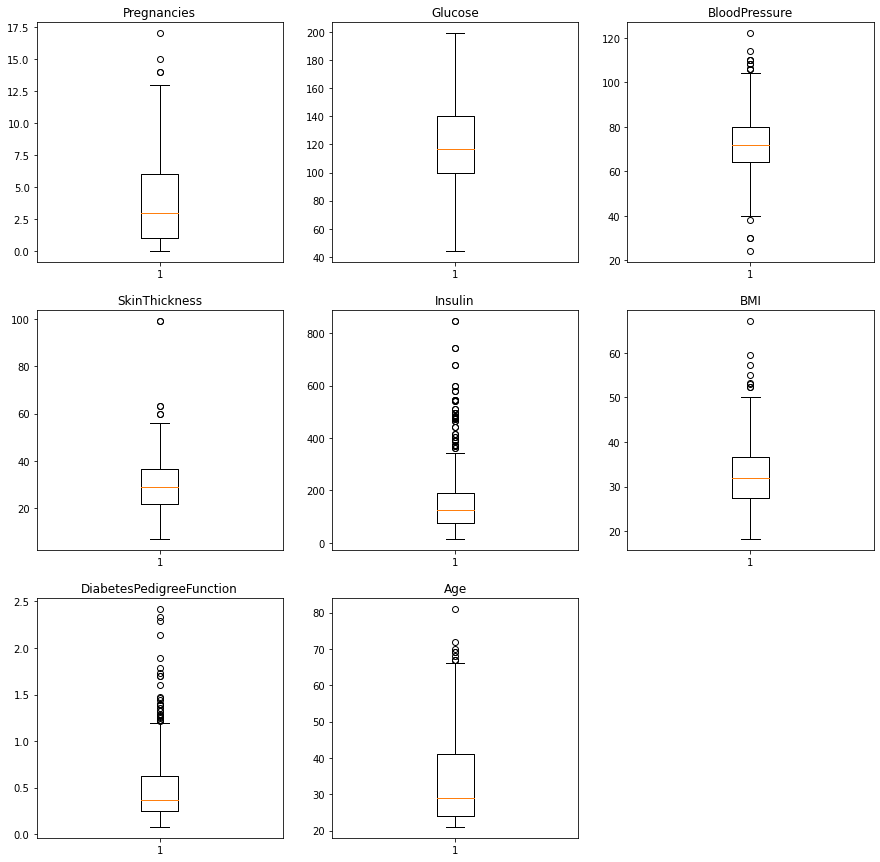

In [108]:
row = 3
col = 3
n = 1
plt.figure(figsize=(15,15))
for i in df.loc[:,:'Age']:
  plt.subplot(row,col,n)
  plt.boxplot(x = df[i]) 
  plt.title(i)
  n += 1
plt.show()  

## Manully handling the outliers with mean() of each feature

In [109]:
df.loc[df['Pregnancies']>=14,'Pregnancies'] = int(df['Pregnancies'].mean())
df.loc[df['SkinThickness']>=60,'SkinThickness'] = int(df['SkinThickness'].mean())
df.loc[df['Insulin']>=318,'Insulin'] = int(df['Insulin'].mean())
df.loc[df['BloodPressure']<=38,'BloodPressure'] = int(df['BloodPressure'].mean())
df.loc[df['BloodPressure']>=106,'BloodPressure'] = int(df['BloodPressure'].mean())
df.loc[df['BMI']>=49,'BMI'] = float(df['BMI'].mean())
df.loc[df['DiabetesPedigreeFunction']>=1.09,'DiabetesPedigreeFunction'] = float(df['DiabetesPedigreeFunction'].mean())
df.loc[df['Age']>=62,'Age'] = int(df['Age'].mean())

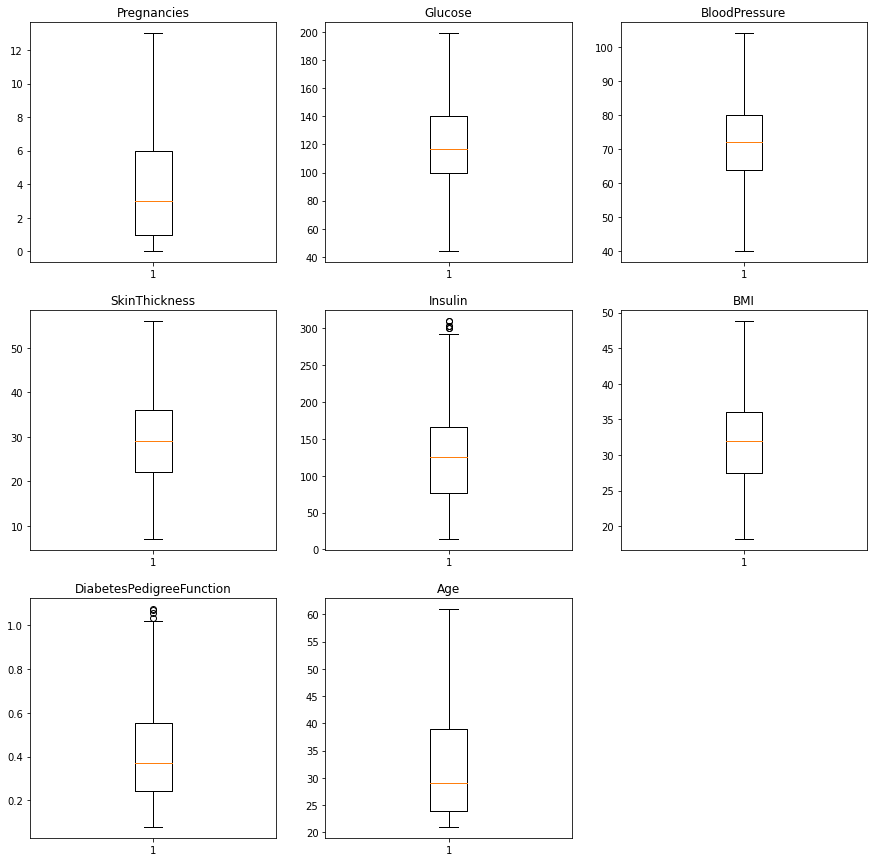

In [110]:
row = 3
col = 3
n = 1
plt.figure(figsize=(15,15))
for i in df.loc[:,:'Age']:
  plt.subplot(row,col,n)
  plt.boxplot(x = df[i]) 
  plt.title(i)
  n += 1
plt.show()  

In [111]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,85.0,66.0,29.0,155.0,26.6,0.351000,31,0
1,8,183.0,64.0,25.0,76.0,23.3,0.672000,32,1
2,1,89.0,66.0,23.0,94.0,28.1,0.167000,21,0
3,0,137.0,40.0,35.0,168.0,43.1,0.471674,33,1
4,5,116.0,74.0,30.0,63.0,25.6,0.201000,30,0


## Sacling our data with StandardScaler

In [112]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [113]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [114]:
x = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.850137,-1.204688,-0.561717,-0.011247,0.398311,-0.877072,-0.299970,-0.113409
1,1.290757,2.016756,-0.745639,-0.417198,-0.835010,-1.402159,1.137068,-0.013884
2,-0.850137,-1.073200,-0.561717,-0.620174,-0.554000,-0.638396,-1.123692,-1.108658
3,-1.155979,0.504650,-2.952703,0.597680,0.601263,1.748360,0.240258,0.085641
4,0.373231,-0.185660,0.173971,0.090241,-1.037962,-1.036189,-0.971483,-0.212934
...,...,...,...,...,...,...,...,...
762,1.902441,-0.678738,0.357892,1.917022,0.788603,0.125366,-1.105785,0.085641
763,-0.544295,0.011572,-0.193873,-0.214223,-0.148097,0.745923,-0.349214,-0.511509
764,0.373231,-0.021300,-0.009951,-0.620174,-0.272990,-0.940719,-0.774506,-0.212934
765,-0.850137,0.143059,-1.113483,0.293217,-0.819398,-0.320162,-0.308923,1.478989


## Spliting our whole data into train and test

In [115]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

## Feature Selection using chi2

In [116]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

ordered_rank_features = SelectKBest(k='all')
ordered_feature = ordered_rank_features.fit(x_train,y_train)

In [117]:
ordered_feature.scores_
pd.concat([pd.DataFrame(ordered_feature.scores_, columns=['Scores']),pd.DataFrame(x_train.columns,columns=['Features'])],axis=1).sort_values(by = 'Scores',ascending=False)

,Scores,Features
1,158.592852,Glucose
7,61.466055,Age
5,37.703943,BMI
2,26.012876,BloodPressure
0,24.643047,Pregnancies
4,15.302065,Insulin
3,11.532573,SkinThickness
6,11.328556,DiabetesPedigreeFunction


In [118]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report

In [119]:
param_grid = {'C': [0.001,0.01,0.1,1,10,100],  
              'penalty':['none', 'l1', 'l2', 'elasticnet'],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'class_weight' : [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}]}

cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=42)

grid = GridSearchCV(LogisticRegression(), param_grid=param_grid, n_jobs=-1, cv=cv, scoring='accuracy')
grid_result = grid.fit(x_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

grid_pred = grid_result.predict(x_test)

print(confusion_matrix(y_test,grid_pred))
print(classification_report(y_test,grid_pred))

Best: 0.764990 using {'C': 0.1, 'class_weight': {0: 1, 1: 1}, 'penalty': 'l1', 'solver': 'liblinear'}
[[136  15]
 [ 32  48]]
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       151
           1       0.76      0.60      0.67        80

    accuracy                           0.80       231
   macro avg       0.79      0.75      0.76       231
weighted avg       0.79      0.80      0.79       231



## Logistic Regression

In [120]:
classifier = LogisticRegression(C=0.1, class_weight={0: 1, 1: 1}, penalty='l1', solver='liblinear')
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

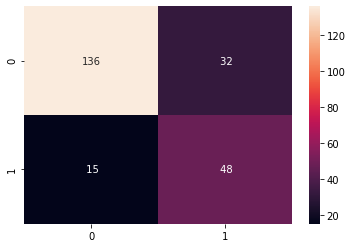

In [121]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True,fmt='3g')
plt.show()

In [122]:
print(classification_report(y_test,y_pred))
print('Training Accuracy: ',classifier.score(x_train,y_train)*100)
print('Testing Accuracy: ',classifier.score(x_test,y_test)*100)

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       151
           1       0.76      0.60      0.67        80

    accuracy                           0.80       231
   macro avg       0.79      0.75      0.76       231
weighted avg       0.79      0.80      0.79       231

Training Accuracy:  76.67910447761194
Testing Accuracy:  79.65367965367966


In [122]:
s